In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io import loadmat 
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.interpolate import spline

mat_dict = loadmat('/Users/carl/Dropbox/Docs/Python/PyCharm/TRIED_RNRF_GIT/TRIED_TP2b/clim_t2C_J1982D2010.mat')
clim_t2 = mat_dict['clim_t2']

# find out what type is in the dict
# if isinstance(clim_t2, list):
#     print('list')
# elif isinstance(clim_t2, np.ndarray):
#     print('ndarray')
#     print(clim_t2.dtype)
# else:
#     print('something else')
    
print(np.shape(clim_t2))

(348, 11)


[ 1982.  1983.  1984.  1985.  1986.  1987.  1988.  1989.  1990.  1991.
  1992.  1993.  1994.  1995.  1996.  1997.  1998.  1999.  2000.  2001.
  2002.  2003.  2004.  2005.  2006.  2007.  2008.  2009.  2010.]
1996.45833333
15.291300067
70.0827546296
8.37154433958
5.73583682805
(348,)
(348,)
[[ 70.28472222   3.66307234]
 [  3.66307234  32.99463629]]
a
0.0522678133202
b
-89.0592114012
size
348
increase over period
18.1369312221
temp at end of 2010
16.0513611857
predicted increase from 2010 to 2110
62.6691081709
predicted temp in 2110
78.7204693566
5.73572451663
156.16913463
0.0367276448718
0.0722375435429


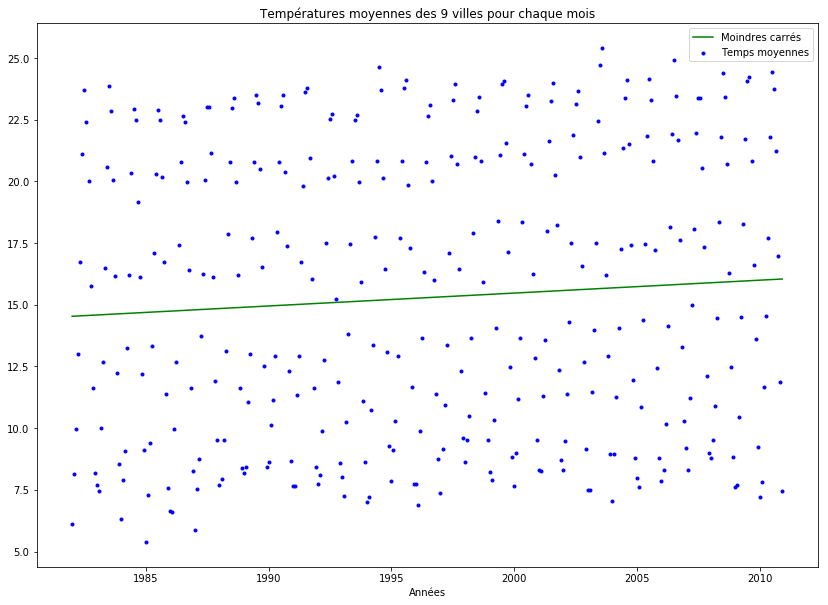

13.960845175


In [97]:
# make list of average values across 9 villes for each month (348x1) - t2moy
clim_t2_moy = np.mean(clim_t2[:, 2:10], 1)
# print(np.shape(clim_t2_moy))
# print(clim_t2_moy)
print(np.unique(clim_t2[:,0]))
# plot new figure
fig = plt.figure(figsize=(14, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Températures moyennes des 9 villes pour chaque mois')
plt.xlabel('Années')
# set y axes -15 to 35
# plt.ylim(-15, 35)
X = clim_t2[:, 0] + ((clim_t2[:, 1] - 1) / 12)
Y = clim_t2_moy
plt.scatter(X, Y, color='b', label='Temps moyennes', marker='.')
# plt.legend(ncol=2, loc=8)

x_bar = np.mean(X)
print(x_bar)
y_bar = np.mean(Y)
print(y_bar)
x_var = np.var(X)
print(x_var)
x_std = np.std(X)
print(x_std)
y_std = np.std(Y)
print(y_std)
print(np.shape(X))
print(np.shape(Y))
xy_covar = np.cov(X, Y)
print(xy_covar)

a = xy_covar[0, 1] / x_var
print('a')
print(a)
print('b')
b = y_bar - (a * x_bar)
print(b)

plt.plot(X, (a * X) + b, color='g', label='Moindres carrés')

print('size')
print(np.size(clim_t2, 0))
# increase over period
print('increase over period')
print(a * (np.size(clim_t2, 0) - 1))
# predicted increase from 2010 to 2110
print('temp at end of 2010')
temp_2010 = (a * 2011) + b
print(temp_2010)
print('predicted increase from 2010 to 2110')
y_increase = a * (1200 - 1) 
print(y_increase)
print('predicted temp in 2110')
temp_2110 = temp_2010 + y_increase
print(temp_2110)

# confidence interval at <5% risk
# * the standard deviation of b1 is: (the estimated standard deviation of y) / RMS of x
y_diff = Y - (a * X) - b
s_numerator = np.sum(np.square(y_diff))
s_denominator = np.size(clim_t2, 0) - 2
s = np.sqrt(s_numerator / s_denominator)
print(s)

x_RMS = np.sqrt(np.sum(np.square(X - np.mean(X))))
print(x_RMS)

a_std = s/x_RMS
print(a_std)

# * the confidence interval of b1 at a given alpha risk value is: alpha * standard deviation of b1
# alpha for 5% with n-2=346 is 1.96684388
conf_interval = 1.96684388 * a_std
print(conf_interval)

# show graph and save
plt.legend()
plt.show()
fig.savefig('t2moy.png')

# t value for n=348-2 is 1.96684388
t = 1.96684388
s2 = np.square(s)
var_numerator = np.square(2110 - x_bar)
var_denominator = np.sum(np.square(X - np.mean(X)))
var = s2 * (1 + (1/np.size(clim_t2, 0)) + (var_numerator / var_denominator))
predict_interval = t * np.sqrt(var)
print(predict_interval)

[ 14.73255479  14.8897482   14.59806397  14.51156506  14.61498847
  14.74630992  14.95358714  15.31795442  15.5754661   15.05222021
  14.77831947  14.87116662  15.35177217  15.26860273  14.76537474
  15.4459064   15.43444559  15.6690606   15.57096782  15.66133932
  15.75618915  15.81779525  15.58882016  15.57986425  15.98207866
  15.7972888   15.82820563  15.74244775  15.54559857]
1996.0
15.291300067
70.0
8.36660026534
0.441257259737
(29,)
(29,)
[[ 72.5          3.25581674]
 [  3.25581674   0.20166183]]
a
0.0465116677244
b
-77.545988711
increase over period
16.1395487004
temp at end of 2010
15.9889750829
predicted increase from 2010 to 2110
55.7674896016
predicted temp in 2110
71.7564646845
0.240202654842
45.0555213043
0.00533125903084
conf interval
0.0109386772795


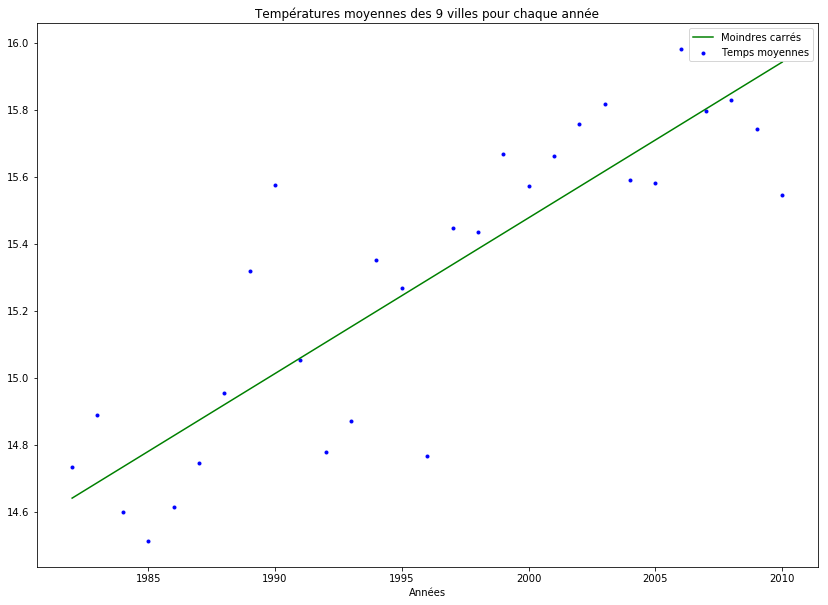

1.34398912078


In [96]:
# make list of average values across 9 villes for each YEAR (29X1) - t2moyan
# first reshape monthly average table
# One shape dimension can be -1. In this case, 
# the value is inferred from the length of the array and remaining dimensions.
# also note for axis reference in numpy: 0 is column, 1 is row
clim_t2_moy = clim_t2_moy.reshape(-1, 12)
clim_t2_moyan = np.mean(clim_t2_moy, 1)
print(clim_t2_moyan)
# print(np.shape(clim_t2_moy))
# print(clim_t2_moy)

# plot new figure
fig = plt.figure(figsize=(14, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Températures moyennes des 9 villes pour chaque année')
plt.xlabel('Années')
# set y axes -15 to 35
# plt.ylim(-15, 35)
X = np.unique(clim_t2[:, 0])
Y = clim_t2_moyan
plt.scatter(X, Y, color='b', label='Temps moyennes', marker='.')
# plt.legend(ncol=2, loc=8)


x_bar = np.mean(X)
print(x_bar)
y_bar = np.mean(Y)
print(y_bar)
x_var = np.var(X)
print(x_var)
x_std = np.std(X)
print(x_std)
y_std = np.std(Y)
print(y_std)
print(np.shape(X))
print(np.shape(Y))
xy_covar = np.cov(X, Y)
print(xy_covar)

a = xy_covar[0, 1] / x_var
print('a')
print(a)
b = y_bar - (a * x_bar)
print('b')
print(b)

plt.plot(X, (a * X) + b, color='g', label='Moindres carrés')

# increase over period
print('increase over period')
print(a * ((np.size(clim_t2_moyan, 0) * 12) - 1))
# predicted increase from end 2010 to 2110
print('temp at end of 2010')
temp_2010 = (a * 2011) + b
print(temp_2010)
print('predicted increase from 2010 to 2110')
y_increase = a * (1200 - 1) 
print(y_increase)
print('predicted temp in 2110')
temp_2110 = temp_2010 + y_increase
print(temp_2110)

# confidence interval at <5% risk
# * the standard deviation of b1 is: (the estimated standard deviation of y) / RMS of x
y_diff = Y - (a * X) - b
s_numerator = np.sum(np.square(y_diff))
s_denominator = np.size(clim_t2_moyan, 0) - 2
s = np.sqrt(s_numerator / s_denominator)
print(s)

x_RMS = np.sqrt(np.sum(np.square(X - np.mean(X))))
print(x_RMS)

a_std = s/x_RMS
print(a_std)

# * the confidence interval of b1 at a given alpha risk value is: alpha * standard deviation of b1
# alpha for 5% with n-2=27 is 2.0518
conf_interval = 2.0518 * a_std
print('conf interval')
print(conf_interval)

# show graph and save
plt.legend()
plt.show()
fig.savefig('t2moyan.png')

# t value for n-2=27 is 2.0518
t = 2.0518
s2 = np.square(s)
var_numerator = np.square(2110 - x_bar)
var_denominator = np.sum(np.square(X - x_bar))
var = s2 * (1 + (1/np.size(clim_t2_moyan, 0)) + (var_numerator / var_denominator))
# value to subtract from predicted value to get +/- interval
predict_interval = t * np.sqrt(var)
print(predict_interval)

[ 15.66133932  15.75618915  15.81779525  15.58882016  15.57986425
  15.98207866  15.7972888   15.82820563  15.74244775  15.54559857]
(10,)
[ 2001.  2002.  2003.  2004.  2005.  2006.  2007.  2008.  2009.  2010.]
2005.5
15.7299627536
8.25
2.87228132327
0.129404503613
(10,)
(10,)
[[  9.16666667e+00  -3.23246830e-03]
 [ -3.23246830e-03   1.86061395e-02]]
a
-0.000391814339678
b
16.5157464118


increase over period
-0.0035263290571
temp at end of 2010
15.7278077747
predicted increase from 2010 to 2110
-0.469785393274
predicted temp in 2110
15.2580223814
0.0787506903751
9.08295106229
0.00867016565817
conf interval
0.0199934020077


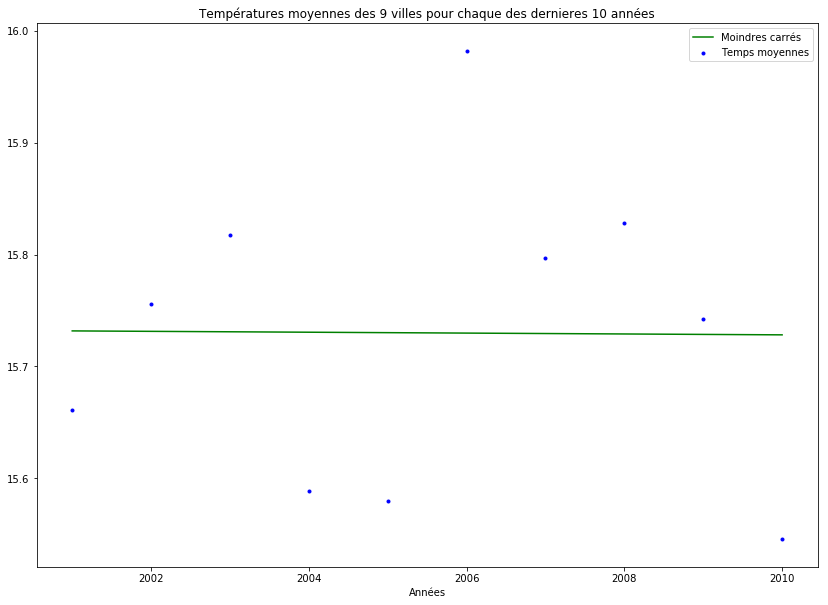

In [86]:
# make list of average values across 9 villes for PAST 10 YEARS ONLY (10X1) - t2moyan10
# print(clim_t2_moyan)
# print(np.shape(clim_t2_moyan))
clim_t2_moyan10 = clim_t2_moyan[19:29]
print(clim_t2_moyan10)
print(np.shape(clim_t2_moyan10))

# plot new figure
fig = plt.figure(figsize=(14, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Températures moyennes des 9 villes pour chaque des dernieres 10 années')
plt.xlabel('Années')
# set y axes -15 to 35
# plt.ylim(-15, 35)
X = np.unique(clim_t2[:, 0])
X = X[19:29]
print(X)
Y = clim_t2_moyan10
plt.scatter(X, Y, color='b', label='Temps moyennes', marker='.')
# plt.legend(ncol=2, loc=8)


x_bar = np.mean(X)
print(x_bar)
y_bar = np.mean(Y)
print(y_bar)
x_var = np.var(X)
print(x_var)
x_std = np.std(X)
print(x_std)
y_std = np.std(Y)
print(y_std)
print(np.shape(X))
print(np.shape(Y))
xy_covar = np.cov(X, Y)
print(xy_covar)

a = xy_covar[0, 1] / x_var
print('a')
print(a)
b = y_bar - (a * x_bar)
print('b')
print(b)

plt.plot(X, (a * X) + b, color='g', label='Moindres carrés')

# increase over period
print('increase over period')
print(a * (np.size(clim_t2_moyan10, 0) - 1))
# predicted increase from end 2010 to 2110
print('temp at end of 2010')
temp_2010 = (a * 2011) + b
print(temp_2010)
print('predicted increase from 2010 to 2110')
y_increase = a * (1200 - 1) 
print(y_increase)
print('predicted temp in 2110')
temp_2110 = temp_2010 + y_increase
print(temp_2110)

# confidence interval at <5% risk
# * the standard deviation of b1 is: (the estimated standard deviation of y) / RMS of x
y_diff = Y - (a * X) - b
s_numerator = np.sum(np.square(y_diff))
s_denominator = np.size(clim_t2_moyan, 0) - 2
s = np.sqrt(s_numerator / s_denominator)
print(s)

x_RMS = np.sqrt(np.sum(np.square(X - np.mean(X))))
print(x_RMS)

a_std = s/x_RMS
print(a_std)

# * the confidence interval of b1 at a given alpha risk value is: alpha * standard deviation of b1
# alpha for 5% with n-2=8 is 2.306
conf_interval = 2.306 * a_std
print('conf interval')
print(conf_interval)

# show graph and save
plt.legend()
plt.show()
fig.savefig('t2moyan10.png')